## 라이브러리

In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings, random
warnings.filterwarnings(action='ignore')

In [2]:
train = pd.read_csv('train.csv')

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          26457 non-null  int64  
 1   gender         26457 non-null  object 
 2   car            26457 non-null  object 
 3   reality        26457 non-null  object 
 4   child_num      26457 non-null  int64  
 5   income_total   26457 non-null  float64
 6   income_type    26457 non-null  object 
 7   edu_type       26457 non-null  object 
 8   family_type    26457 non-null  object 
 9   house_type     26457 non-null  object 
 10  DAYS_BIRTH     26457 non-null  int64  
 11  DAYS_EMPLOYED  26457 non-null  int64  
 12  FLAG_MOBIL     26457 non-null  int64  
 13  work_phone     26457 non-null  int64  
 14  phone          26457 non-null  int64  
 15  email          26457 non-null  int64  
 16  occyp_type     18286 non-null  object 
 17  family_size    26457 non-null  float64
 18  begin_

In [4]:
train.head(2)

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0


## 결측치 확인

In [5]:
train.isnull().sum()

index               0
gender              0
car                 0
reality             0
child_num           0
income_total        0
income_type         0
edu_type            0
family_type         0
house_type          0
DAYS_BIRTH          0
DAYS_EMPLOYED       0
FLAG_MOBIL          0
work_phone          0
phone               0
email               0
occyp_type       8171
family_size         0
begin_month         0
credit              0
dtype: int64

* occpy_type만 null값 존재 확인 -> 수가 높으므로 제거하기 보다 'no work'로 카테고리 추가할지 고려

### EDA를 위한 type변환

In [6]:
# credit 형 변환
train = train.astype({'credit': 'object'})
print(train.dtypes)

index              int64
gender            object
car               object
reality           object
child_num          int64
income_total     float64
income_type       object
edu_type          object
family_type       object
house_type        object
DAYS_BIRTH         int64
DAYS_EMPLOYED      int64
FLAG_MOBIL         int64
work_phone         int64
phone              int64
email              int64
occyp_type        object
family_size      float64
begin_month      float64
credit            object
dtype: object


### (1) Categorical Variable EDA

* 신용등급별 비율 확인

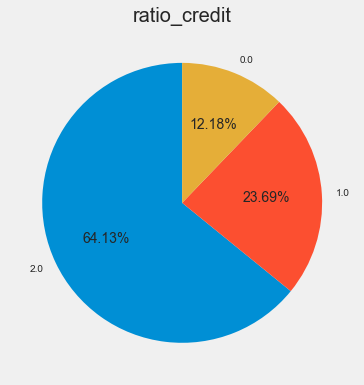

In [13]:
plt.subplots(figsize = (6,6))
plt.pie(train['credit'].value_counts(), labels = train['credit'].value_counts().index, 
        autopct="%.2f%%", shadow = False, startangle = 90)
plt.title('ratio_credit', size=20)
plt.show()

#### * 낮은 신용등급(2)의 비율이 높은 것 확인

### - 변수별 credit 차이 확인

In [8]:
# 등급에 따른 차이를 보기 위한 데이터 분류
train_0 = train[train['credit']==0.0]
train_1 = train[train['credit']==1.0]
train_2 = train[train['credit']==2.0]

In [17]:
# Categorical 그래프 함수 정의
def cat_plot(column):

    f, ax = plt.subplots(1, 3, figsize=(16, 6))


    sns.countplot(x = column,
                data = train_0,
                ax = ax[0],
                order = train_0[column].value_counts().index)
    ax[0].tick_params(labelsize=12)
    ax[0].set_title('credit = 0')
    ax[0].set_ylabel('count')
    ax[0].tick_params(rotation=50)


    sns.countplot(x = column,
                data = train_1,
                ax = ax[1],
                order = train_1[column].value_counts().index)
    ax[1].tick_params(labelsize=12)
    ax[1].set_title('credit = 1')
    ax[1].set_ylabel('count')
    ax[1].tick_params(rotation=50)

    sns.countplot(x = column,
                data = train_2,
                ax = ax[2],
                order = train_2[column].value_counts().index)
    ax[2].tick_params(labelsize=12)
    ax[2].set_title('credit = 2')
    ax[2].set_ylabel('count')
    ax[2].tick_params(rotation=50)
    plt.subplots_adjust(wspace=0.3, hspace=0.3)
    plt.show()

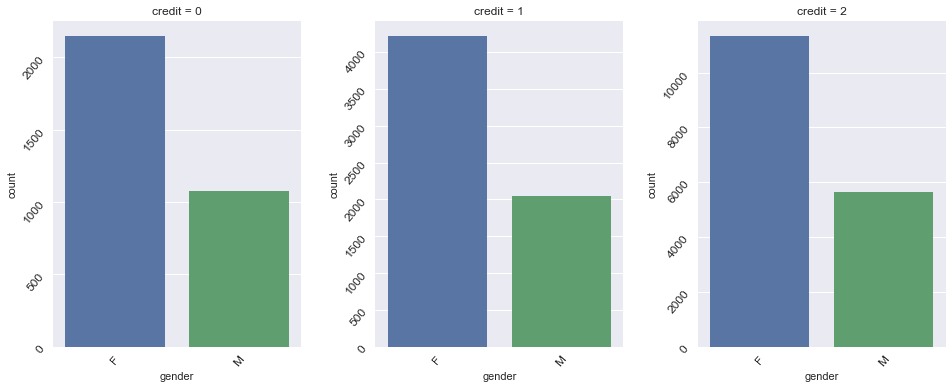

In [26]:
#성별에 따른 차이
cat_plot('gender')

* 모든 등급에서 여성이 많으나 전체 표본수도 거의 2배 많아서 전체적인 비율은 비슷

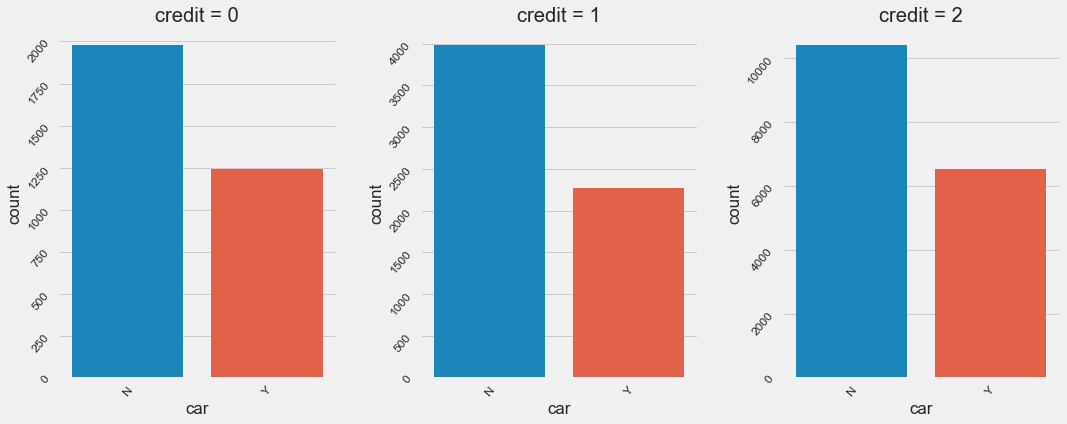

In [22]:
#차 소유 여부에 따른 차이
cat_plot('car')

* 모든 등급에서 차를 갖지 않은 사람이 많았음 -> 뚜렷한 차이 없음

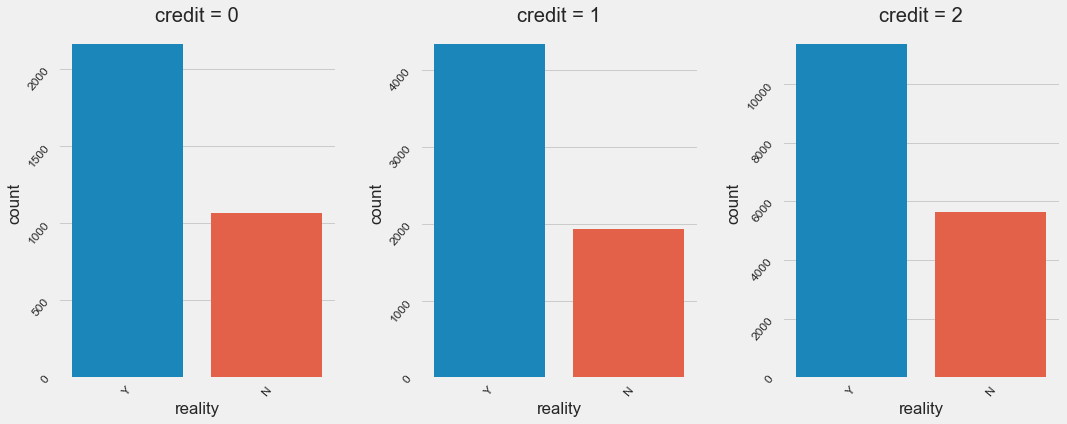

In [23]:
#부동산 소유 여부 차이
cat_plot('reality')

* 모든 등급에서 가진 사람이 더 많았으나 등급과의 뚜렷한 차이 없음

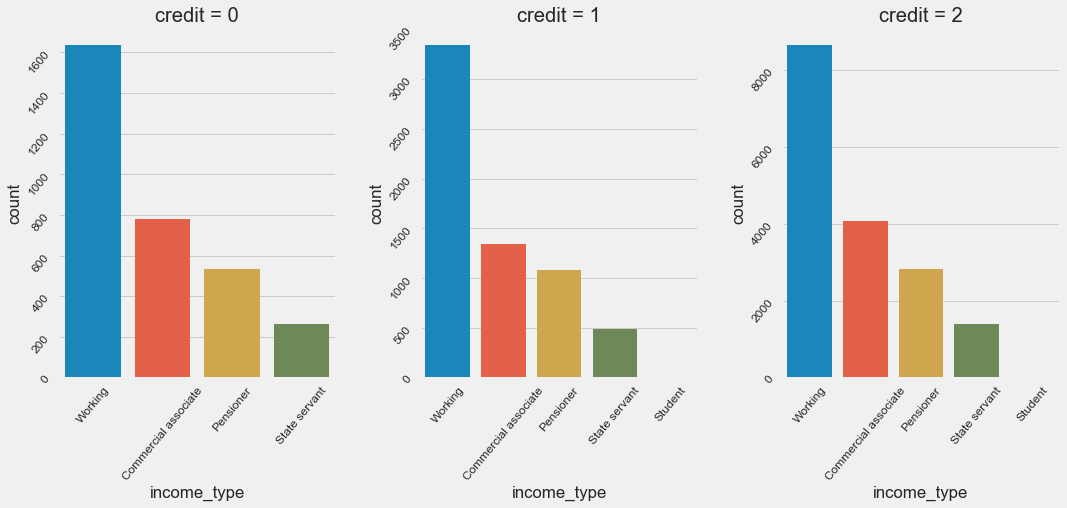

In [25]:
#소득 분류의 차이
cat_plot('income_type')

* 가장 높은 0등급에는 student가 없는 것 확인

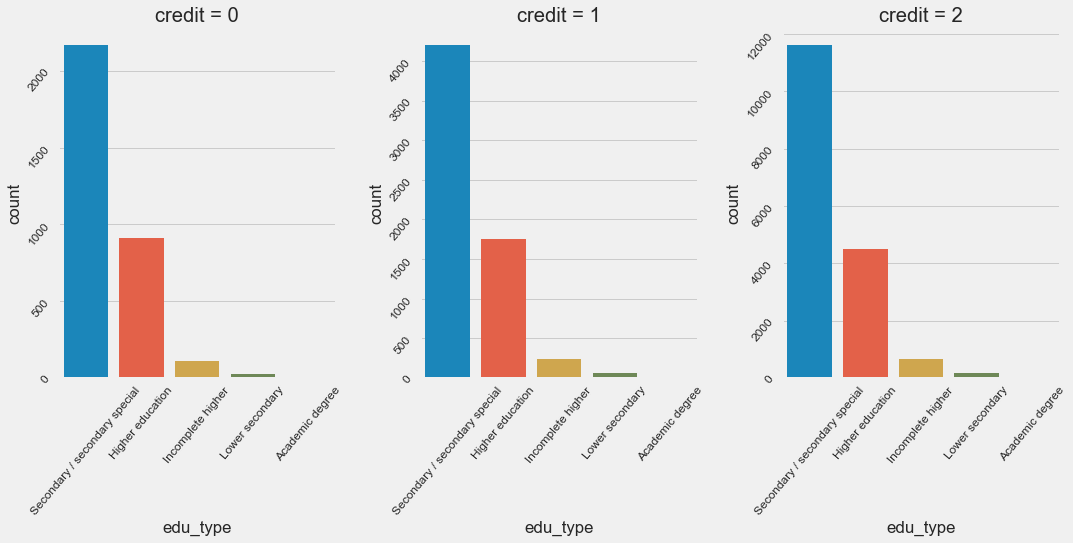

In [29]:
#교육수준 따른 차이
cat_plot('edu_type')

* 교육수준에 따른 차이 없음

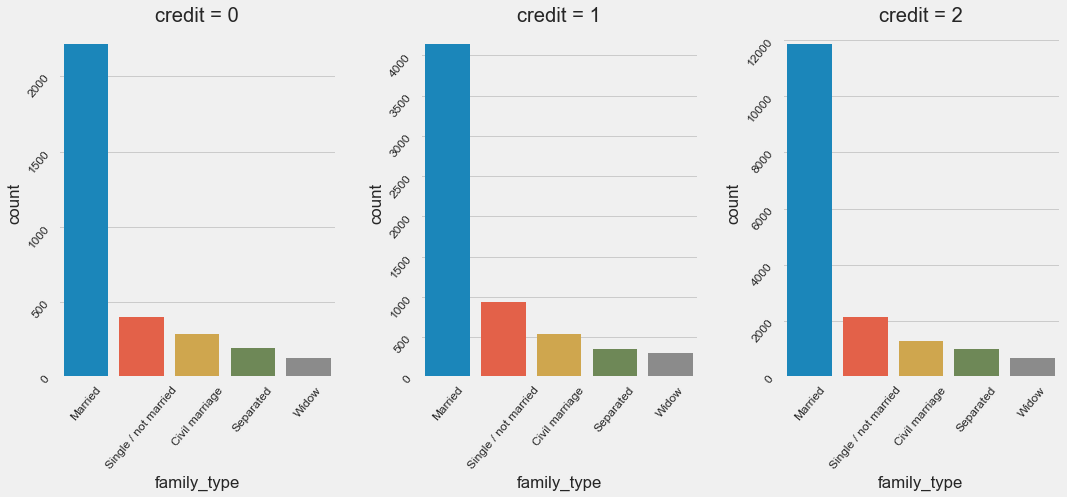

In [31]:
#가족 구성에 따른 차이
cat_plot('family_type')

* 모든 등급에 결혼한 사람이 많음

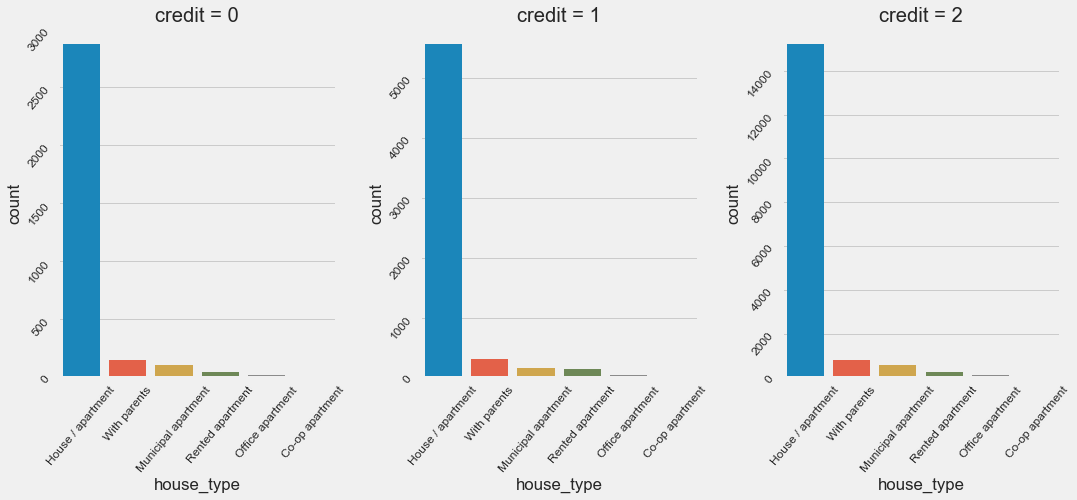

In [33]:
#집형태에 따른 차이
cat_plot('house_type')

* 분포 비슷

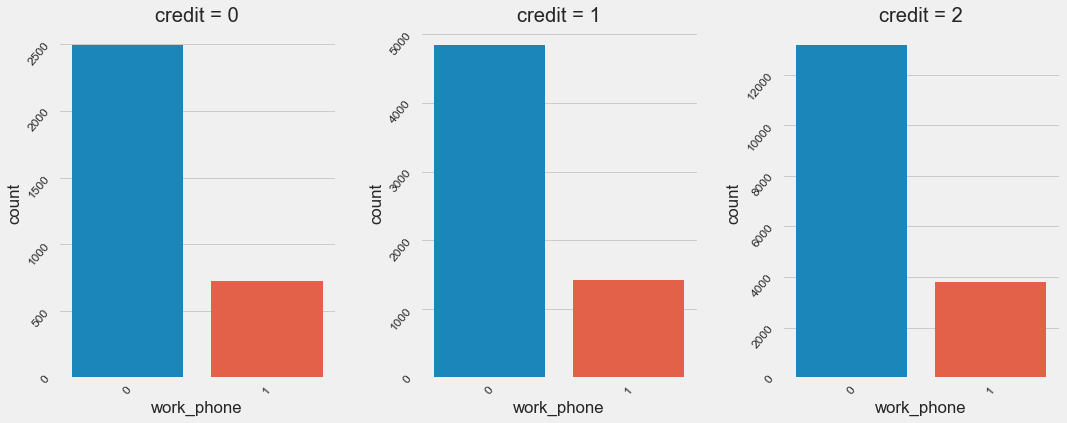

In [35]:
#집전화에 따른 차이(핸드폰은 모두 1이라 진행x)
cat_plot('work_phone')

* 없는 사람이 대부분 -> 핸드폰이 다 있으므로

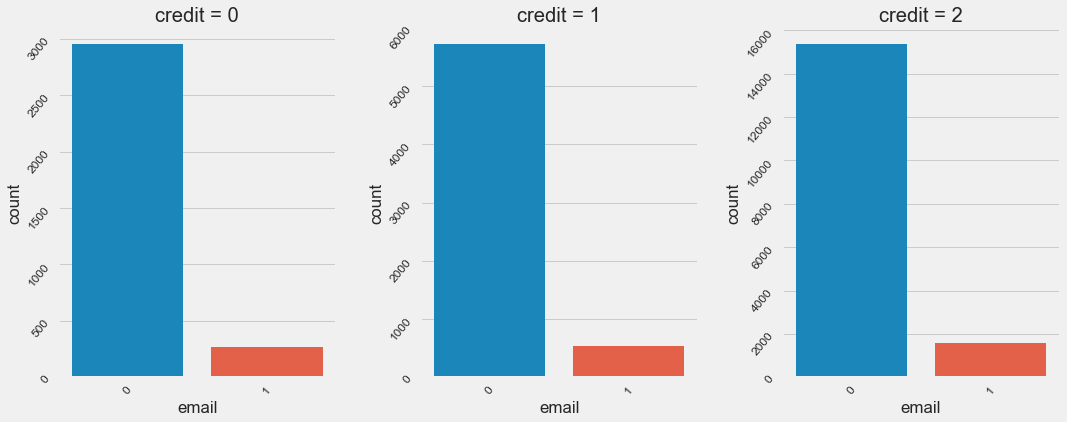

In [37]:
# 이메일 소유에 따른 차이
cat_plot('email')

* 대부분 없음

In [40]:
#직업 유형에 따른 등급차이 (결측치는 무직으로 생각 -> no job 대치)
train_0 = train_0.fillna({'occyp_type':'No job'})
train_1 = train_1.fillna({'occyp_type':'No job'})
train_2 = train_2.fillna({'occyp_type':'No job'})

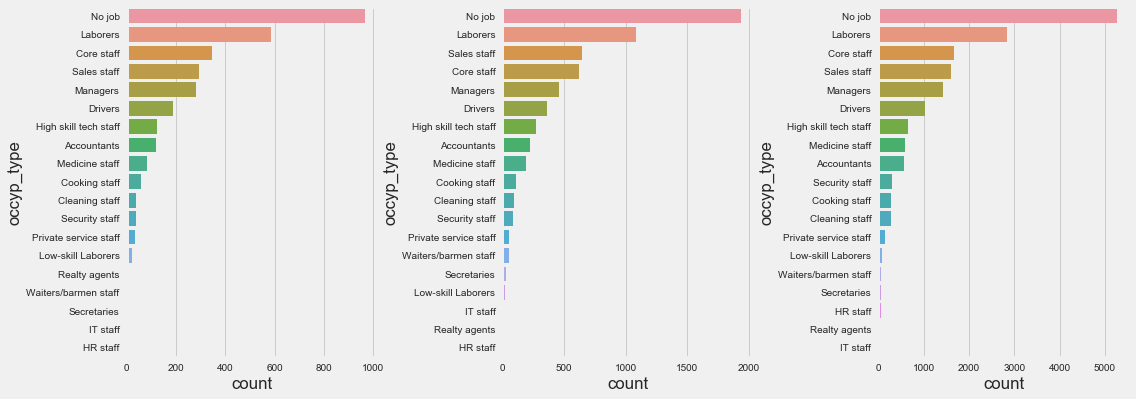

In [41]:
f, ax = plt.subplots(1, 3, figsize=(16, 6))
sns.countplot(y = 'occyp_type', data = train_0, order = train_0['occyp_type'].value_counts().index, ax=ax[0])
sns.countplot(y = 'occyp_type', data = train_1, order = train_1['occyp_type'].value_counts().index, ax=ax[1])
sns.countplot(y = 'occyp_type', data = train_2, order = train_2['occyp_type'].value_counts().index, ax=ax[2])
plt.subplots_adjust(wspace=0.5, hspace=0.3)
plt.show()

* 모든 등급에서 무직자가 제일 많았으며, 그 다음은 노동자이고 대동소이

## (2) Numerical Variable EDA

In [44]:
# Numerical 그래프 함수 정의
def num_plot(column):
  
    fig, axes = plt.subplots(1, 3, figsize=(16, 6))


    sns.distplot(train_0[column],
                ax = axes[0])
    axes[0].tick_params(labelsize=12)
    axes[0].set_title('credit = 0')
    axes[0].set_ylabel('count')

    sns.distplot(train_1[column],
                ax = axes[1])
    axes[1].tick_params(labelsize=12)
    axes[1].set_title('credit = 1')
    axes[1].set_ylabel('count')

    sns.distplot(train_2[column],
                ax = axes[2])
    axes[2].tick_params(labelsize=12)
    axes[2].set_title('credit = 2')
    axes[2].set_ylabel('count')
    plt.subplots_adjust(wspace=0.3, hspace=0.3)

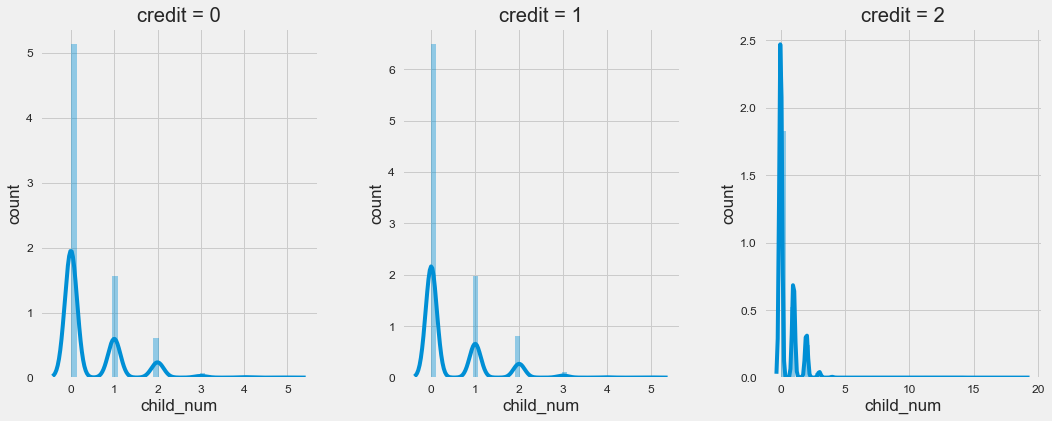

In [45]:
#자녀수에 따른 차이
num_plot('child_num')

* 분포의 큰 차이는 없음

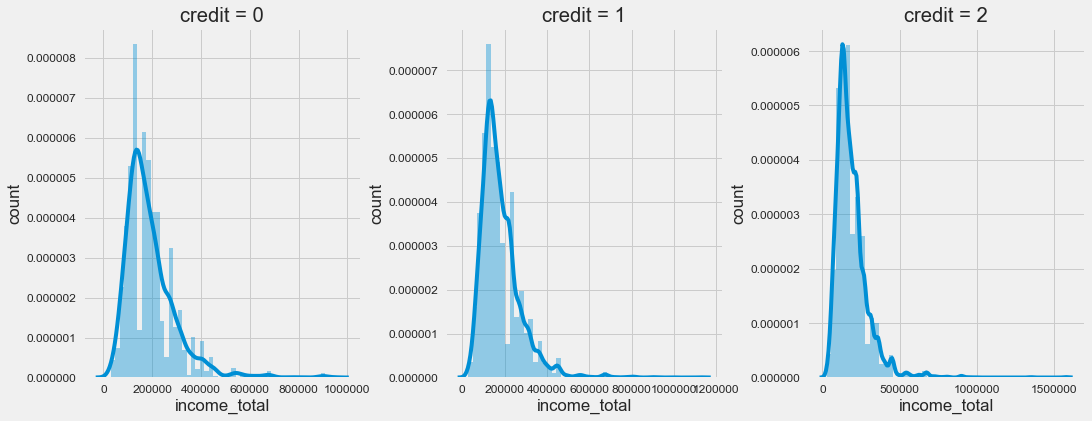

In [47]:
#소득수준에 따른 차이
num_plot('income_total')

In [57]:
#나이에 따른 등급 차이
#나이 변환
train_0['age'] = round(abs(train['DAYS_BIRTH'])/365.5,0).astype(np.int64)
train_1['age'] = round(abs(train['DAYS_BIRTH'])/365.5,0).astype(np.int64)
train_2['age'] = round(abs(train['DAYS_BIRTH'])/365.5,0).astype(np.int64)

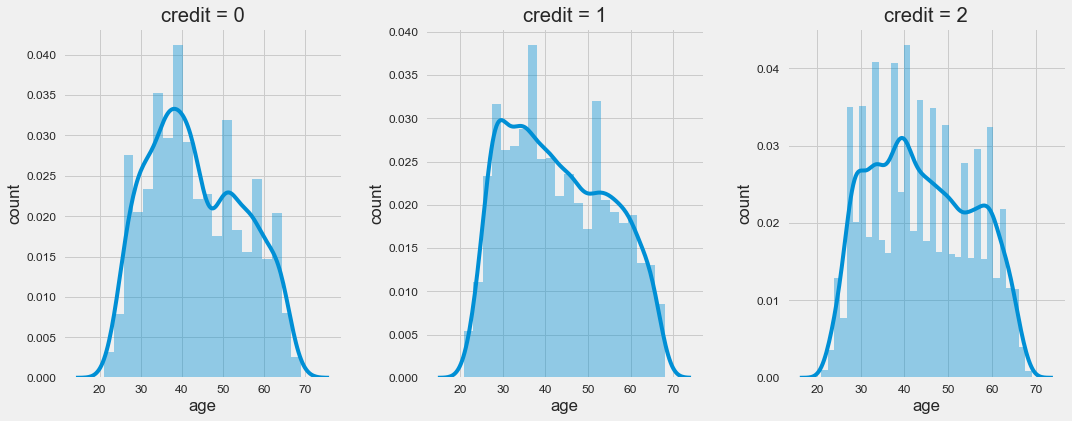

In [58]:
num_plot('age')

* 큰 차이는 없으나 20대가 적은 것 확인 -> 신용카드 발급이 적으므로

In [62]:
#업무기간에 따른 차이 -> 무직은 0으로 대체 후 년도로 바꾸기
train_0['EMPLOYED']= train_0['DAYS_EMPLOYED'].map(lambda x: 0 if x>0 else x)
train_1['EMPLOYED']= train_1['DAYS_EMPLOYED'].map(lambda x: 0 if x>0 else x)
train_2['EMPLOYED']= train_2['DAYS_EMPLOYED'].map(lambda x: 0 if x>0 else x)
train_0['EMPLOYED'] = abs(train_0['EMPLOYED'])/365
train_1['EMPLOYED'] = abs(train_1['EMPLOYED'])/365
train_2['EMPLOYED'] = abs(train_2['EMPLOYED'])/365
#타입 변경
train_0 = train_0.astype({'EMPLOYED': 'int'})
train_1 = train_1.astype({'EMPLOYED': 'int'})
train_2 = train_2.astype({'EMPLOYED': 'int'})
train_0['EMPLOYED'].head()

3      5
7     14
12     5
15    11
22     3
Name: EMPLOYED, dtype: int32

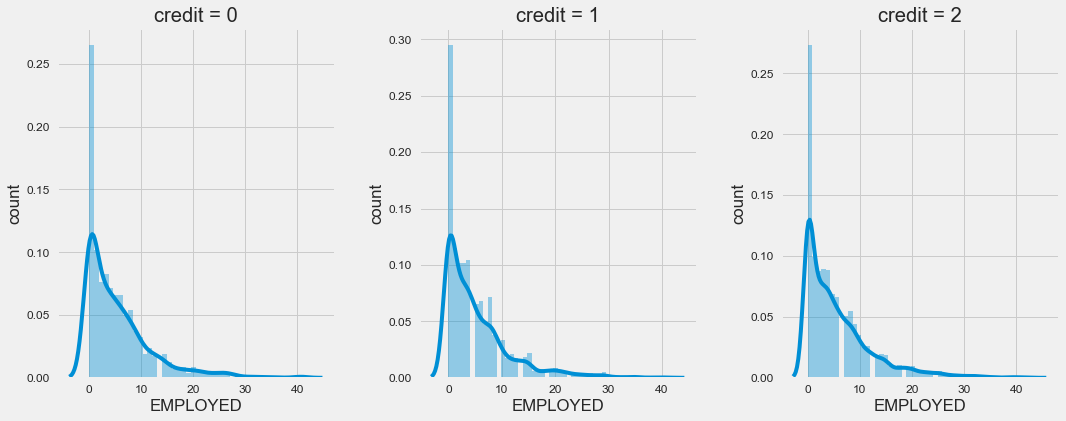

In [63]:
num_plot("EMPLOYED")

* 무직이 많으며 대체적으로 근속연수는 짧음